## Experiments: RSAST per dataset type

In [23]:
import sys 
import os 
#add sast library path
file_path = os.path.dirname(os.getcwd())+"/sast"

#file_path = r"C:\Users\Public\random_sast\sast"
sys.path.append(file_path)

file_path = os.path.dirname(os.getcwd())+"\sast"


#file_path = r"C:\Users\Public\random_sast\sast"
sys.path.append(file_path)

file_path = os.getcwd()+"/sast"


#file_path = r"C:\Users\Public\random_sast\sast"
sys.path.append(file_path)

file_path = os.getcwd()+"\sast"


#file_path = r"C:\Users\Public\random_sast\sast"
sys.path.append(file_path)

#add cd_diagram library path
file_path = os.path.dirname(os.getcwd())+"\cd_diagram"

#file_path = r"C:\Users\Public\random_sast\cd_diagram"
sys.path.append(file_path)


file_path = os.path.dirname(os.getcwd())+"/cd_diagram"
#file_path = r"C:\Users\Public\random_sast\sast"
sys.path.append(file_path)

file_path = os.getcwd()+"\cd_diagram"
#file_path = r"C:\Users\Public\random_sast\sast"
sys.path.append(file_path)

file_path = os.getcwd()+"/cd_diagram"
#file_path = r"C:\Users\Public\random_sast\sast"
sys.path.append(file_path)

sys.path


['/home/nirojasvar/random_sast/ExperimentationRSAST',
 '/home/nirojasvar/anaconda3/envs/rsast_env/lib/python310.zip',
 '/home/nirojasvar/anaconda3/envs/rsast_env/lib/python3.10',
 '/home/nirojasvar/anaconda3/envs/rsast_env/lib/python3.10/lib-dynload',
 '',
 '/home/nirojasvar/anaconda3/envs/rsast_env/lib/python3.10/site-packages',
 '/home/nirojasvar/random_sast/sast',
 '/home/nirojasvar/random_sast\\sast',
 '/home/nirojasvar/random_sast/ExperimentationRSAST/sast',
 '/home/nirojasvar/random_sast/ExperimentationRSAST\\sast',
 '/home/nirojasvar/random_sast\\cd_diagram',
 '/home/nirojasvar/random_sast/cd_diagram',
 '/home/nirojasvar/random_sast/ExperimentationRSAST\\cd_diagram',
 '/home/nirojasvar/random_sast/ExperimentationRSAST/cd_diagram',
 '/home/nirojasvar/random_sast/sast',
 '/home/nirojasvar/random_sast\\sast',
 '/home/nirojasvar/random_sast/ExperimentationRSAST/sast',
 '/home/nirojasvar/random_sast/ExperimentationRSAST\\sast',
 '/home/nirojasvar/random_sast\\cd_diagram',
 '/home/nir

In [24]:
from sast import *
from sktime.datasets import load_UCR_UEA_dataset, tsc_dataset_names
from sktime.classification.kernel_based import RocketClassifier
import time
import pandas as pd
from sktime.transformations.panel.shapelet_transform import ShapeletTransform
import matplotlib.pyplot as plt
import os
import seaborn as sns
hyperparameter='ACF&PACF: n_random_points=30 nb_inst_per_class=1'

### Reading Datasets

In [25]:
# Set directory where the csv files are located
directory = os.getcwd()+'/ResultsByClassifier'

# Create an empty list to store the dataframes
dfs = []

# Loop through all files in the directory
for filename in os.listdir(directory):
    # Check if the file starts with "df_overall_tunning" and ends with ".csv"
    if filename.endswith(".csv"):
        # Read the csv file into a dataframe
        filepath = os.path.join(directory, filename)
        df = pd.read_csv(filepath)

        # Append the dataframe to the list
        df['filename']=filename
        dfs.append(df)

# Concatenate all the dataframes in the list into one dataframe
df_other_methods = pd.concat(dfs, ignore_index=True)
df_other_methods=df_other_methods[['filename','folds:','0']]
df_other_methods['method']=df_other_methods['filename'].str.split('_').str[0]
df_other_methods
df_other_methods=df_other_methods.rename(columns={'folds:':'dataset','0':'score'})
df_other_methods=df_other_methods[['dataset','score','method']]



In [26]:
df_other_methods['method'].unique()

array(['SAST', 'ROCKET', 'HIVE-COTEv1', 'BOSS', 'RISE', 'TSF',
       'InceptionTime', 'TS-CHIEF', 'S-BOSS', 'STC', 'ResNet',
       'ProximityForest', 'WEASEL', 'Catch22', 'cBOSS'], dtype=object)

In [27]:
df_other_methods=df_other_methods[df_other_methods['method'].isin(['SAST','ROCKET','STC','HIVE-COTEv1'])]

In [28]:
# Set directory where the csv files are located
#directory = os.getcwd()+'/ResultsRsast'
#directory = os.getcwd()+'/results_accuracy_per_ds'

directories=[]
directories.append(os.getcwd()+'/ResultsRsast/Server17_Comparison_RSAST')
#directories.append(os.getcwd()+'/ResultsRsast/Server16_Hyperparameter_Tunning')
#directories.append(os.getcwd()+'/ResultsRsast/Server17_Hyperparameter_Tunning')
#directories.append(os.getcwd()+'/results_accuracy_per_ds')
#directories.append(os.getcwd()+'/results_accuracy_per_ds_10000')

# Create an empty list to store the dataframes
dfs = []

# Loop through all files in the directory
for directory in directories:
    for filename in os.listdir(directory):
        # Check if the file starts with "df_overall_tunning" and ends with ".csv"
        if filename.startswith("df_all_overall_tunning") and filename.endswith(".csv"):
            # Read the csv file into a dataframe
            filepath = os.path.join(directory, filename)
            df = pd.read_csv(filepath)
            df['rpoint']=df['rpoint'].astype(str)
            df['nb_per_class']=df['nb_per_class'].astype(str)
            df['rpoint']=df['rpoint'].replace("(lenthg ts)//2","half_len")
            df['nb_per_class']=df['nb_per_class'].replace("(max instances per class)//2","half_instance")
            df['classifier_name']=df['classifier_name'].str.replace("\(lenthg ts\)//2","half_len")
            df['classifier_name']=df['classifier_name'].str.replace("\(max instances per class\)//2","half_instance")
            # Append the dataframe to the list
            dfs.append(df)

# Concatenate all the dataframes in the list into one dataframe
df_result = pd.concat(dfs, ignore_index=True)
# df_result.head(3)

/tmp/ipykernel_9769/1477594906.py:27: FutureWarning: The default value of regex will change from True to False in a future version.
  df['classifier_name']=df['classifier_name'].str.replace("\(lenthg ts\)//2","half_len")
/tmp/ipykernel_9769/1477594906.py:28: FutureWarning: The default value of regex will change from True to False in a future version.
  df['classifier_name']=df['classifier_name'].str.replace("\(max instances per class\)//2","half_instance")
/tmp/ipykernel_9769/1477594906.py:27: FutureWarning: The default value of regex will change from True to False in a future version.
  df['classifier_name']=df['classifier_name'].str.replace("\(lenthg ts\)//2","half_len")
/tmp/ipykernel_9769/1477594906.py:28: FutureWarning: The default value of regex will change from True to False in a future version.
  df['classifier_name']=df['classifier_name'].str.replace("\(max instances per class\)//2","half_instance")
/tmp/ipykernel_9769/1477594906.py:27: FutureWarning: The default value of rege

In [29]:
df_result.columns

Index(['Unnamed: 0', 'accuracy', 'time', 'cweights_time', 'fsubsequence_time',
       'tdataset_time', 'tclassifier_time', 'dataset_name', 'classifier_name',
       'rpoint', 'nb_per_class', 'method', 'len_method'],
      dtype='object')

In [30]:


df_result=df_result[df_result["classifier_name"]==hyperparameter]
df_result.dataset_name.unique()


array(['MiddlePhalanxOutlineAgeGroup', 'FreezerSmallTrain', 'Wafer',
       'DistalPhalanxOutlineAgeGroup', 'ECG200', 'ItalyPowerDemand',
       'ToeSegmentation2', 'TwoLeadECG', 'ProximalPhalanxOutlineCorrect',
       'CBF', 'ToeSegmentation1', 'TwoPatterns', 'WordSynonyms', 'UMD',
       'Strawberry', 'FaceAll', 'GunPointMaleVersusFemale',
       'GunPointOldVersusYoung', 'PowerCons', 'SonyAIBORobotSurface2',
       'ProximalPhalanxOutlineAgeGroup', 'CricketY', 'FiftyWords',
       'FreezerRegularTrain', 'Trace', 'Wine',
       'MiddlePhalanxOutlineCorrect', 'FaceFour', 'ProximalPhalanxTW',
       'SwedishLeaf', 'SonyAIBORobotSurface1', 'PhalangesOutlinesCorrect',
       'ECG5000', 'GunPoint', 'SmoothSubspace', 'DiatomSizeReduction',
       'CricketZ', 'CricketX', 'ChlorineConcentration', 'ElectricDevices',
       'GunPointAgeSpan', 'ECGFiveDays', 'Chinatown', 'Adiac',
       'DistalPhalanxOutlineCorrect', 'Plane', 'Coffee',
       'MiddlePhalanxTW', 'MoteStrain', 'Crop', 'SyntheticC

In [31]:

df_other_methods=df_other_methods.rename(columns={"dataset":"dataset_name","score":"accuracy","method":"classifier_name"})
df_other_methods = df_other_methods[df_other_methods['dataset_name'].isin(df_result.dataset_name.values)]
df_other_methods.columns

Index(['dataset_name', 'accuracy', 'classifier_name'], dtype='object')

In [32]:
# concatenate the two dataframes
concatenated_df = pd.concat([df_other_methods, df_result])

# reset the index of the concatenated dataframe
concatenated_df = concatenated_df.reset_index(drop=True)


In [33]:
concatenated_df['classifier_name'].unique()

array(['SAST', 'ROCKET', 'HIVE-COTEv1', 'STC',
       'ACF&PACF: n_random_points=30 nb_inst_per_class=1'], dtype=object)

In [34]:
uca_ds=pd.read_excel("DataSetsUCLASummary.xlsx")
uca_ds.columns

Index(['USED SAST', 'BAKE OFF', 'USED RSAST ADA', 'N RUNS',
       'Duration per Run (h)', 'Tested Len Methods', 'Tested P', 'Tested K',
       'ID', 'Name', 'Type', 'Train ', 'Test ', 'Class', 'Length', 'ED (w=0)',
       'DTW (learned_w) ', 'DTW (w=100)', 'Default rate', 'Data donor/editor'],
      dtype='object')

In [35]:
concatenated_df=concatenated_df.merge(uca_ds, left_on=['dataset_name'],right_on=['Name'])
concatenated_df.columns

Index(['dataset_name', 'accuracy', 'classifier_name', 'Unnamed: 0', 'time',
       'cweights_time', 'fsubsequence_time', 'tdataset_time',
       'tclassifier_time', 'rpoint', 'nb_per_class', 'method', 'len_method',
       'USED SAST', 'BAKE OFF', 'USED RSAST ADA', 'N RUNS',
       'Duration per Run (h)', 'Tested Len Methods', 'Tested P', 'Tested K',
       'ID', 'Name', 'Type', 'Train ', 'Test ', 'Class', 'Length', 'ED (w=0)',
       'DTW (learned_w) ', 'DTW (w=100)', 'Default rate', 'Data donor/editor'],
      dtype='object')

In [36]:
df_result=df_result.merge(uca_ds, left_on=['dataset_name'],right_on=['Name'])
df_result.columns

Index(['Unnamed: 0', 'accuracy', 'time', 'cweights_time', 'fsubsequence_time',
       'tdataset_time', 'tclassifier_time', 'dataset_name', 'classifier_name',
       'rpoint', 'nb_per_class', 'method', 'len_method', 'USED SAST',
       'BAKE OFF', 'USED RSAST ADA', 'N RUNS', 'Duration per Run (h)',
       'Tested Len Methods', 'Tested P', 'Tested K', 'ID', 'Name', 'Type',
       'Train ', 'Test ', 'Class', 'Length', 'ED (w=0)', 'DTW (learned_w) ',
       'DTW (w=100)', 'Default rate', 'Data donor/editor'],
      dtype='object')

In [37]:
df_result=df_result[['accuracy','dataset_name','classifier_name','time','Type']]

### Overall analysis

#### Accuracy: RSAST vs Other methods

In [38]:
#acc_per_type=pd.pivot_table(df_result, values="accuracy", index=["dataset_name","Type"])
acc_per_type=df_result
acc_per_type=acc_per_type.reset_index()

In [39]:
acc_per_type.columns

Index(['index', 'accuracy', 'dataset_name', 'classifier_name', 'time', 'Type'], dtype='object')

/tmp/ipykernel_9769/2277519590.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


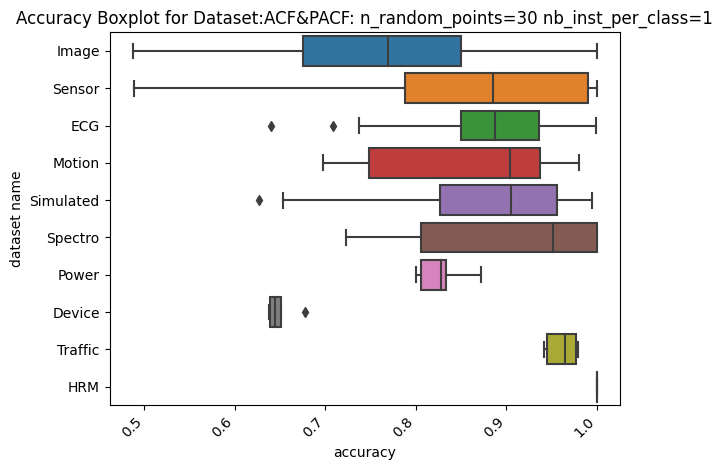

In [40]:
max_bx=max(df_result.accuracy)
min_bx=min(df_result.accuracy)


#df_to_cd=pd.pivot_table(df_to_cd, index=['dataset_name','classifier_name'], columns=['rpoint'],values='accuracy')
#df_to_cd = df_to_cd.reindex(columns=["1","10","30","50","100","half_len"])

#print(df_to_cd.head(5))

# Plot
fig, ax = plt.subplots()


#order=list(df_to_cd)
sns.boxplot(data=acc_per_type, y='Type', x='accuracy')
#plt.boxplot(df_to_cd, labels=list(df_to_cd), showfliers=False)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Axis details

ax.set(ylabel='dataset name', xlabel='accuracy', title='Accuracy Boxplot for Dataset:'+str(df_result["classifier_name"].unique()[0]))

#plt.xticks([1, 2, 3, 4, 5, 6],list(df_to_cd) )
#print(df_to_cd.describe())
plt.tight_layout()
# save plot
plt.savefig('images_boxplot_acc_per_type/boxplot_acc'+str(df_result["classifier_name"].unique()[0])+'.png')

In [41]:
# create a pivot table with the mean of score by hyperparameter
score_by_method=pd.pivot_table(concatenated_df, values='accuracy', index=['classifier_name'],columns=['Type'], aggfunc='count')

In [42]:
t_score_by_method=score_by_method.transpose()
t_score_by_method
t_score_by_method[[hyperparameter]].round(2)/5


classifier_name,ACF&PACF: n_random_points=30 nb_inst_per_class=1
Type,
Device,1.0
ECG,4.0
HRM,1.0
Image,22.0
Motion,9.0
Power,1.0
Sensor,11.0
Simulated,6.0
Spectro,3.0


In [43]:
t_score_by_method[[hyperparameter,"SAST"]].describe().round(2)

classifier_name,ACF&PACF: n_random_points=30 nb_inst_per_class=1,SAST
count,10.00,10.00
mean,29.50,5.90
std,33.45,6.69
min,5.00,1.00
25%,5.00,1.00
50%,17.50,3.50
75%,41.25,8.25
max,110.00,22.00


In [44]:
# create a pivot table with the mean of time by hyperparameter
time_per_method=pd.pivot_table(df_result, values='time', columns=['classifier_name'],index=['Type'], aggfunc='mean')/60
time_per_method

classifier_name,ACF&PACF: n_random_points=30 nb_inst_per_class=1
Type,
Device,11.328982
ECG,0.325851
HRM,0.258992
Image,4.177519
Motion,2.286817
Power,0.214377
Sensor,0.499499
Simulated,0.310136
Spectro,0.512661
